# On charge les datas

In [77]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import normaltest, norm, gamma, chisquare, f_oneway, kruskal, spearmanr

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 200000)

df1 = pd.read_csv("/home/sylvain/Bureau/Sylvain/reconversion_Machine_learning/Project_2/2015-building-energy-benchmarking.csv", sep = ',')
df2 = pd.read_csv("/home/sylvain/Bureau/Sylvain/reconversion_Machine_learning/Project_2/2016-building-energy-benchmarking.csv", sep = ',')

energystar = True #si False on ne tient pas compte d'energystar

## On regarde quelles sont les colonnes manquantes/présentes dans les deux dataframes

In [78]:
L1 = df1.columns.tolist()
L2 = df2.columns.tolist()
for i in L1:
    if i not in L2:
        print(i)

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


In [79]:
L1 = df1.columns.tolist()
L2 = df2.columns.tolist()
for i in L2:
    if i not in L1:
        print(i)

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


## On supprime les doublons dans chaque dataframe

In [80]:
# sans tenir compte de la colonne id
print(df1.shape)
print(df2.shape)

for col in df1.select_dtypes('object'):
    df1[col] = df1[col].str.lower()

for col in df2.select_dtypes('object'):
    df2[col] = df2[col].str.lower()

df1 = df1.drop_duplicates(subset = df1.columns.values.tolist()[1:]) 
df2 = df2.drop_duplicates(subset = df2.columns.values.tolist()[1:])
print(df1.shape)
print(df2.shape)

(3340, 47)
(3376, 46)
(3340, 47)
(3376, 46)


## On extrait les differentes variables présentes dans la colonnes 'location' pour df1 car ces mêmes variables sont présentes dans df2. puis on supprimes les colonnes df1 qui ne sont pas présentes dans df2

In [81]:
df1 = df1.rename(str.lower, axis = 'columns')
df2 = df2.rename(str.lower, axis = 'columns')

df1['latitude'] = np.nan
df1['longitude'] = np.nan
df1['address'] = np.nan
df1['city'] = np.nan
df1['zipcode'] = np.nan
df1['state'] = np.nan

df1 = df1.rename(columns = {"ghgemissions(metrictonsco2e)": "totalghgemissions", 
                            "comment":"comments",
                            "ghgemissionsintensity(kgco2e/ft2)": "ghgemissionsintensity"})
                                                                 
for i in np.arange(df1.shape[0]):    
    d = df1['location'].iloc[i]
    d = d.replace("'{", "{")
    d = d.replace("}'", "}")
    d = d.replace("'", "\"")
    d = json.loads(d)
    df1['latitude'].iloc[i] = float(d['latitude']) 
    df1['longitude'].iloc[i] = float(d['longitude']) 
    df1['address'].iloc[i] = d['human_address']['address']
    df1['city'].iloc[i] = d['human_address']['city']
    df1['state'].iloc[i] = d['human_address']['state']
    df1['zipcode'].iloc[i] = int(d['human_address']['zip'])

del(df1['otherfueluse(kbtu)']) 
del(df1['2010 census tracts']) 
del(df1['seattle police department micro community policing plan areas']) 
del(df1['city council districts']) 
del(df1['spd beats']) 
del(df1['location'])
del(df1['zip codes'])

df1 = df1.reindex(columns = df2.columns)

/home/sylvain/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## On concatene df1 et df2

In [82]:
df = pd.concat([df1, df2], ignore_index = True)
df.shape   

(6716, 46)

In [83]:
df.head(100)

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,address,city,state,zipcode,taxparcelidentificationnumber,councildistrictcode,neighborhood,latitude,longitude,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kwh),electricity(kbtu),naturalgas(therms),naturalgas(kbtu),defaultdata,comments,compliancestatus,outlier,totalghgemissions,ghgemissionsintensity
0,1,2015,nonresidential,hotel,mayflower park hotel,405 olive way,seattle,wa,98101.0,659000030,7,downtown,47.612190,-122.337997,1927,1.0,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,no,NaN,compliant,NaN,249.43,2.64
1,2,2015,nonresidential,hotel,paramount hotel,724 pine st,seattle,wa,98101.0,659000220,7,downtown,47.613106,-122.333358,1996,1.0,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,no,NaN,compliant,NaN,263.51,2.38
2,3,2015,nonresidential,hotel,westin hotel,1900 5th ave,seattle,wa,98101.0,659000475,7,downtown,47.613349,-122.337699,1969,1.0,41.0,961990,0,961990,"hotel, parking, swimming pool",hotel,757243.0,parking,100000.0,swimming pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,yes,NaN,compliant,NaN,2061.48,1.92
3,5,2015,nonresidential,hotel,hotel max,620 stewart st,seattle,wa,98101.0,659000640,7,downtown,47.614216,-122.336609,1926,1.0,10.0,61320,0,61320,hotel,hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,no,NaN,compliant,high outlier,1936.34,31.38
4,8,2015,nonresidential,hotel,warwick seattle hotel,401 lenora st,seattle,wa,98121.0,659000970,7,downtown,47.613754,-122.340924,1980,1.0,18.0,119890,12460,107430,"hotel, parking, swimming pool",hotel,123445.0,parking,68009.0,swimming pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,no,NaN,compliant,NaN,507.70,4.02
5,9,2015,nonresidential cos,other,west precinct (seattle police),810 virginia st,seattle,wa,98101.0,660000560,7,downtown,47.616439,-122.336764,1999,1.0,2.0,97288,37198,60090,police station,police station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,no,NaN,compliant,NaN,304.62,2.81
6,10,2015,nonresidential,hotel,camlin worldmark hotel,1619 9th ave,seattle,wa,98101.0,660000825,7,downtown,47.614114,-122.332741,1926,1.0,11.0,83008,0,83008,hotel,hotel,81352.0,NaN,NaN,NaN,NaN,NaN,25.0,76.9,79.6,149.5,158.2,6252842.0,6477493.0,0.0,785342.0,2679698.0,35733.0,3573255.0,no,NaN,compliant,NaN,208.46,2.37
7,11,2015,nonresidential,other,paramount theater,901 pine st,seattle,wa,98101.0,660000955,7,downtown,47.612902,-122.331309,1926,1.0,8.0,102761,0,102761,other - entertainment/public assembly,other - entertainment/public assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,no,NaN,compliant,NaN,199.99,1.77
8,12,2015,nonresidential,hotel,courtyard by marriott - alaska bldg seattle,612 2nd ave,seattle,wa,98104.0,939000080,7,downtown,47.602589,-122.332553,1904,1.0,15.0,163984,0,163984,hotel,hotel,163984.0,NaN,NaN,NaN,NaN,NaN,46.0,77.0,82.9,174.6,186.8,12633744.0,13589025.0,0.0,2155728.0,7355649.0,52784.0,5278400.0,no,NaN,compliant,NaN,331.61,1.83
9,13,2015,multifamily mr (5-9),mid-rise mult

## On homogeneise les valeures text. On filtres sur 'buildingtype' pour ne garder que les batiments non familiaux. 

In [84]:
for col in df.select_dtypes('object'):
    df[col] = df[col].str.lower()
df.shape

(6716, 46)

In [85]:
mask = ~df['buildingtype'].str.contains('multifamily')
df = df[mask == True]
df.shape

(3318, 46)

In [86]:
df.head(100)

,osebuildingid,datayear,buildingtype,primarypropertytype,propertyname,address,city,state,zipcode,taxparcelidentificationnumber,councildistrictcode,neighborhood,latitude,longitude,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),listofallpropertyusetypes,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,yearsenergystarcertified,energystarscore,siteeui(kbtu/sf),siteeuiwn(kbtu/sf),sourceeui(kbtu/sf),sourceeuiwn(kbtu/sf),siteenergyuse(kbtu),siteenergyusewn(kbtu),steamuse(kbtu),electricity(kwh),electricity(kbtu),naturalgas(therms),naturalgas(kbtu),defaultdata,comments,compliancestatus,outlier,totalghgemissions,ghgemissionsintensity
0,1,2015,nonresidential,hotel,mayflower park hotel,405 olive way,seattle,wa,98101.0,659000030,7,downtown,47.612190,-122.337997,1927,1.0,12.0,88434,0,88434,hotel,hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,no,NaN,compliant,NaN,249.43,2.64
1,2,2015,nonresidential,hotel,paramount hotel,724 pine st,seattle,wa,98101.0,659000220,7,downtown,47.613106,-122.333358,1996,1.0,11.0,103566,15064,88502,"hotel, parking, restaurant",hotel,83880.0,parking,15064.0,restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,no,NaN,compliant,NaN,263.51,2.38
2,3,2015,nonresidential,hotel,westin hotel,1900 5th ave,seattle,wa,98101.0,659000475,7,downtown,47.613349,-122.337699,1969,1.0,41.0,961990,0,961990,"hotel, parking, swimming pool",hotel,757243.0,parking,100000.0,swimming pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,yes,NaN,compliant,NaN,2061.48,1.92
3,5,2015,nonresidential,hotel,hotel max,620 stewart st,seattle,wa,98101.0,659000640,7,downtown,47.614216,-122.336609,1926,1.0,10.0,61320,0,61320,hotel,hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,no,NaN,compliant,high outlier,1936.34,31.38
4,8,2015,nonresidential,hotel,warwick seattle hotel,401 lenora st,seattle,wa,98121.0,659000970,7,downtown,47.613754,-122.340924,1980,1.0,18.0,119890,12460,107430,"hotel, parking, swimming pool",hotel,123445.0,parking,68009.0,swimming pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,no,NaN,compliant,NaN,507.70,4.02
5,9,2015,nonresidential cos,other,west precinct (seattle police),810 virginia st,seattle,wa,98101.0,660000560,7,downtown,47.616439,-122.336764,1999,1.0,2.0,97288,37198,60090,police station,police station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,no,NaN,compliant,NaN,304.62,2.81
6,10,2015,nonresidential,hotel,camlin worldmark hotel,1619 9th ave,seattle,wa,98101.0,660000825,7,downtown,47.614114,-122.332741,1926,1.0,11.0,83008,0,83008,hotel,hotel,81352.0,NaN,NaN,NaN,NaN,NaN,25.0,76.9,79.6,149.5,158.2,6252842.0,6477493.0,0.0,785342.0,2679698.0,35733.0,3573255.0,no,NaN,compliant,NaN,208.46,2.37
7,11,2015,nonresidential,other,paramount theater,901 pine st,seattle,wa,98101.0,660000955,7,downtown,47.612902,-122.331309,1926,1.0,8.0,102761,0,102761,other - entertainment/public assembly,other - entertainment/public assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,no,NaN,compliant,NaN,199.99,1.77
8,12,2015,nonresidential,hotel,courtyard by marriott - alaska bldg seattle,612 2nd ave,seattle,wa,98104.0,939000080,7,downtown,47.602589,-122.332553,1904,1.0,15.0,163984,0,163984,hotel,hotel,163984.0,NaN,NaN,NaN,NaN,NaN,46.0,77.0,82.9,174.6,186.8,12633744.0,13589025.0,0.0,2155728.0,7355649.0,52784.0,5278400.0,no,NaN,compliant,NaN,331.61,1.83
10,15,2015,nonresidential,hotel,hotel monaco

## On supprime les colonnes trop imcompletes

In [87]:
df.count()/df.shape[0]

osebuildingid                      1.000000
datayear                           1.000000
buildingtype                       1.000000
primarypropertytype                1.000000
propertyname                       1.000000
address                            1.000000
city                               1.000000
state                              1.000000
zipcode                            0.995178
taxparcelidentificationnumber      0.999699
councildistrictcode                1.000000
neighborhood                       1.000000
latitude                           1.000000
longitude                          1.000000
yearbuilt                          1.000000
numberofbuildings                  0.999397
numberoffloors                     0.997589
propertygfatotal                   1.000000
propertygfaparking                 1.000000
propertygfabuilding(s)             1.000000
listofallpropertyusetypes          0.981013
largestpropertyusetype             0.978602
largestpropertyusetypegfa       

In [88]:
del(df['secondlargestpropertyusetype'])
del(df['secondlargestpropertyusetypegfa'])
del(df['thirdlargestpropertyusetype'])
del(df['thirdlargestpropertyusetypegfa'])
del(df['yearsenergystarcertified'])
del(df['defaultdata'])
del(df['comments'])
del(df['outlier'])
if energystar == False:
    del(df['energystarscore'])

## On supprime les colonnes text n'ayant pas d'intêret. Les colonnes types Header / ID etc.. non pas d'intérêt.

In [89]:
df.dtypes.where(df.dtypes == 'object')

osebuildingid                       NaN
datayear                            NaN
buildingtype                     object
primarypropertytype              object
propertyname                     object
address                          object
city                             object
state                            object
zipcode                             NaN
taxparcelidentificationnumber    object
councildistrictcode                 NaN
neighborhood                     object
latitude                            NaN
longitude                           NaN
yearbuilt                           NaN
numberofbuildings                   NaN
numberoffloors                      NaN
propertygfatotal                    NaN
propertygfaparking                  NaN
propertygfabuilding(s)              NaN
listofallpropertyusetypes        object
largestpropertyusetype           object
largestpropertyusetypegfa           NaN
energystarscore                     NaN
siteeui(kbtu/sf)                    NaN


In [90]:
del(df['osebuildingid']) # data type ID
del(df['datayear']) # seulement 2 valeurs
del(df['buildingtype']) # n'est plus necessaire puissqu'on a filtre sur cette  colonne
del(df['propertyname']) # property name contient trop de valuer text differente
del(df['address']) # inutilisable
del(df['city']) # presente 1 seule valeur
del(df['state']) # présente 1 seule valeur
del(df['compliancestatus']) # présente ~1 seule valeur

## On supprime les colonnes comptant trop de valeur text

In [91]:
df.select_dtypes('object').nunique()/df.shape[0]

primarypropertytype              0.009042
taxparcelidentificationnumber    0.553044
neighborhood                     0.004219
listofallpropertyusetypes        0.116637
largestpropertyusetype           0.017179
dtype: float64

In [92]:
del(df['taxparcelidentificationnumber'])
del(df['listofallpropertyusetypes']) 
del(df['largestpropertyusetype']) 

## On supprime les NA

In [93]:
df = df.dropna(how = 'any', axis = 0)
df.shape

(2152, 27)

## On supprime les valeurs < 0 pour la target energy totale 'siteenergyuse(kbtu)'. Puis on supprime les outliers aux quantiles (0.1) et (0.9)

In [94]:
if energystar == True:
    df = df[(df['siteenergyuse(kbtu)'] > 0) &
        (df['siteenergyuse(kbtu)'] >= df['siteenergyuse(kbtu)'].quantile(0.01)) &
        (df['siteenergyuse(kbtu)'] <= df['siteenergyuse(kbtu)'].quantile(0.99)) &
        (df['energystarscore']) >=0]
else:
    df = df[(df['siteenergyuse(kbtu)'] > 0) &
        (df['siteenergyuse(kbtu)'] >= df['siteenergyuse(kbtu)'].quantile(0.01)) &
        (df['siteenergyuse(kbtu)'] <= df['siteenergyuse(kbtu)'].quantile(0.99))]

df.shape


'''
limitL = df['siteenergyuse(kbtu)'].quantile(0.25)
limitH = df['siteenergyuse(kbtu)'].quantile(0.75)
iqr = limitH - limitL

limitL = limitL - 1.5*iqr
limitH = limitH + 1.5*iqr

if energystar == True:
    df = df[(df['siteenergyuse(kbtu)'] > 0) &
            (df['siteenergyuse(kbtu)'] >= limitL) &
            (df['siteenergyuse(kbtu)'] <= limitH) &
            (df['energystarscore'] >=0)]
else:
    df = df[(df['siteenergyuse(kbtu)'] > 0) &
            (df['siteenergyuse(kbtu)'] >= limitL) &
            (df['siteenergyuse(kbtu)'] <= limitH)]

df.shape'''

"\nlimitL = df['siteenergyuse(kbtu)'].quantile(0.25)\nlimitH = df['siteenergyuse(kbtu)'].quantile(0.75)\niqr = limitH - limitL\n\nlimitL = limitL - 1.5*iqr\nlimitH = limitH + 1.5*iqr\n\nif energystar == True:\n    df = df[(df['siteenergyuse(kbtu)'] > 0) &\n            (df['siteenergyuse(kbtu)'] >= limitL) &\n            (df['siteenergyuse(kbtu)'] <= limitH) &\n            (df['energystarscore'] >=0)]\nelse:\n    df = df[(df['siteenergyuse(kbtu)'] > 0) &\n            (df['siteenergyuse(kbtu)'] >= limitL) &\n            (df['siteenergyuse(kbtu)'] <= limitH)]\n\ndf.shape"

In [95]:
# On visualise quels feature peuvent avoir des valeurs négatives.
df.min()

primarypropertytype          distribution center
zipcode                                  98020.0
councildistrictcode                            1
neighborhood                             ballard
latitude                                47.49917
longitude                             -122.41182
yearbuilt                                   1900
numberofbuildings                            0.0
numberoffloors                               0.0
propertygfatotal                           16300
propertygfaparking                            -2
propertygfabuilding(s)                    -43310
largestpropertyusetypegfa                 8061.0
energystarscore                              1.0
siteeui(kbtu/sf)                             0.0
siteeuiwn(kbtu/sf)                           0.0
sourceeui(kbtu/sf)                          -2.0
sourceeuiwn(kbtu/sf)                        -2.1
siteenergyuse(kbtu)                          0.0
siteenergyusewn(kbtu)                        0.0
steamuse(kbtu)      

In [96]:
# On filtre donc les colonnes contenant des valeurs négatives uniquement de manière a ne garder 
# que les valeurs positives
df = df[(df['propertygfaparking'] >= 0) & 
        (df['propertygfabuilding(s)'] >= 0) & 
        (df['sourceeui(kbtu/sf)'] >= 0) &
        (df['sourceeuiwn(kbtu/sf)'] >= 0) &
        (df['electricity(kwh)'] >= 0) &
        (df['electricity(kbtu)'] >= 0) &
        (df['totalghgemissions'] >= 0) &
        (df['ghgemissionsintensity'] >= 0)]
df.shape

(2148, 27)

In [97]:
df.min()

primarypropertytype          distribution center
zipcode                                  98020.0
councildistrictcode                            1
neighborhood                             ballard
latitude                                47.49917
longitude                             -122.41182
yearbuilt                                   1900
numberofbuildings                            0.0
numberoffloors                               0.0
propertygfatotal                           16300
propertygfaparking                             0
propertygfabuilding(s)                      3636
largestpropertyusetypegfa                 8061.0
energystarscore                              1.0
siteeui(kbtu/sf)                             0.0
siteeuiwn(kbtu/sf)                           0.0
sourceeui(kbtu/sf)                           0.0
sourceeuiwn(kbtu/sf)                         0.0
siteenergyuse(kbtu)                          0.0
siteenergyusewn(kbtu)                        0.0
steamuse(kbtu)      

# Selection des features

### On visualise les données, on va regarder les correlation qu'il peut y avoir entre les inputs et les outputs. On va également passer certaines variables au log de manière a pouvoir réaliser des test statistique et limiter les outliers

In [98]:
# Positionnement des outputs en fin de table
a = df.pop('totalghgemissions') 
b = df.pop('siteenergyuse(kbtu)')
df['totalemission'] = b
df['totalenergie'] = a

# Suppression des colonnes energies
for col in df:
    if re.match(r'[\w]*\(kbtu[/]?[\w]*\)', col) or re.match(r'[\w]*\(kwh\)', col) or re.match(r'[\w]*\(therms\)', col):
        del(df[col])
        
del(df['ghgemissionsintensity'])
df = df[df['primarypropertytype'] != 'low-rise multifamily']
df.shape

(2147, 16)

In [99]:
df.count()/df.shape[0]

primarypropertytype          1.0
zipcode                      1.0
councildistrictcode          1.0
neighborhood                 1.0
latitude                     1.0
longitude                    1.0
yearbuilt                    1.0
numberofbuildings            1.0
numberoffloors               1.0
propertygfatotal             1.0
propertygfaparking           1.0
propertygfabuilding(s)       1.0
largestpropertyusetypegfa    1.0
energystarscore              1.0
totalemission                1.0
totalenergie                 1.0
dtype: float64

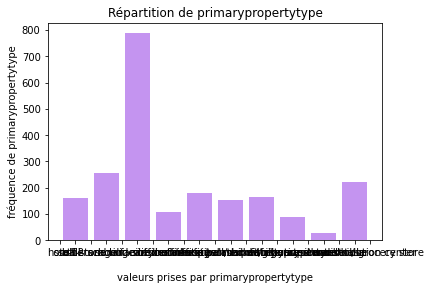

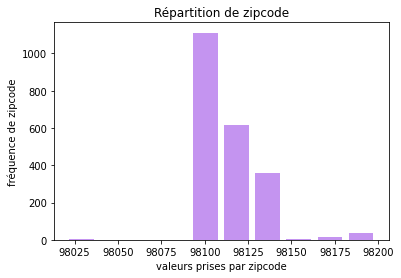

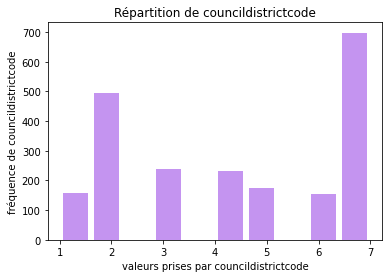

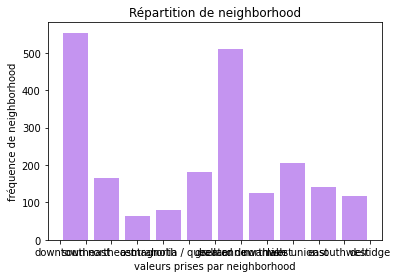

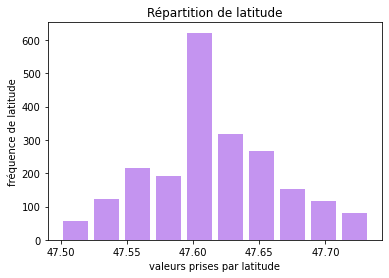

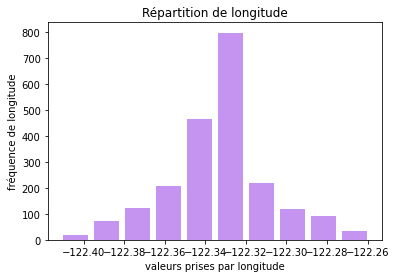

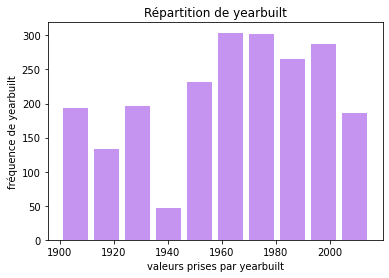

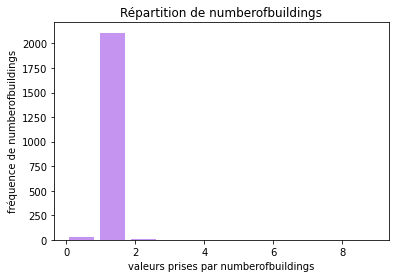

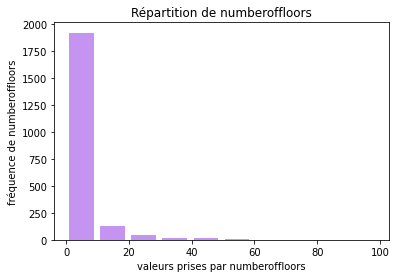

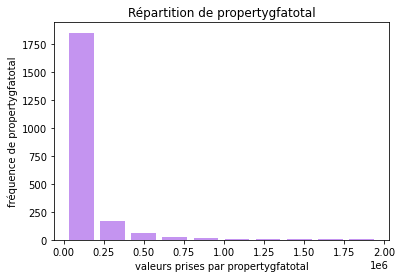

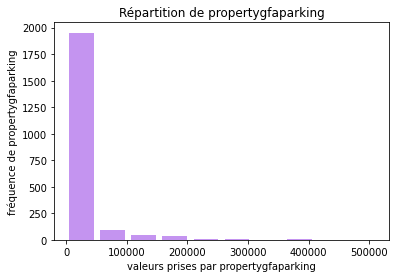

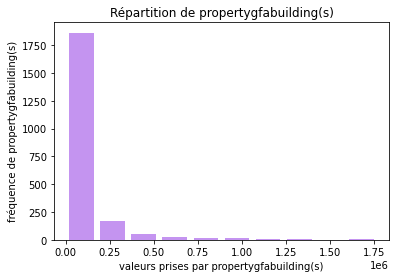

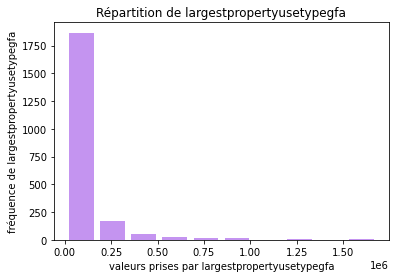

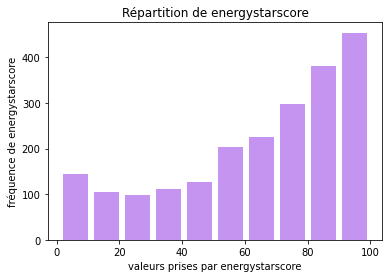

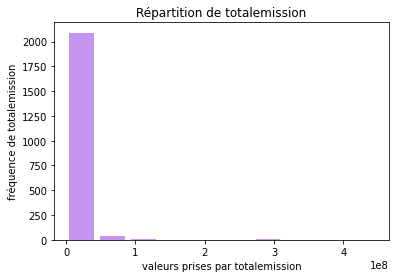

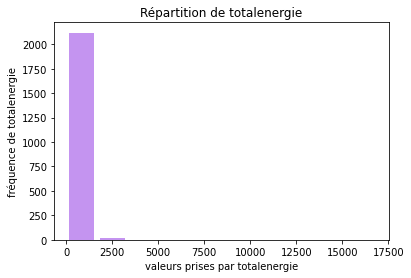

In [100]:
#visualisation brut des données
for col in df:
    plt.hist(df[col], color = 'blueviolet', alpha = 0.5, histtype = 'barstacked', rwidth=0.8)
    plt.xlabel('valeurs prises par {}'.format(col))
    plt.ylabel('fréquence de {}'.format(col))
    plt.title('Répartition de {}'.format(col))
    plt.show()


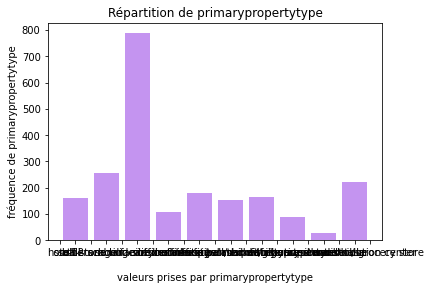

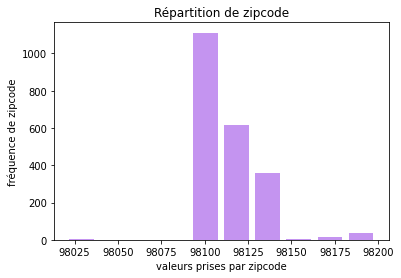

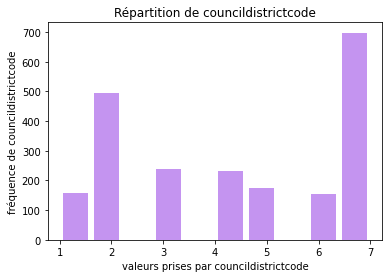

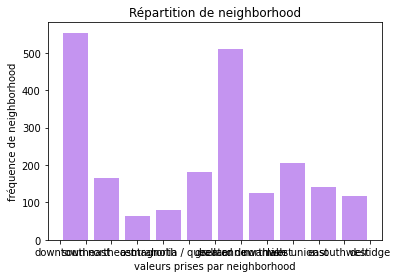

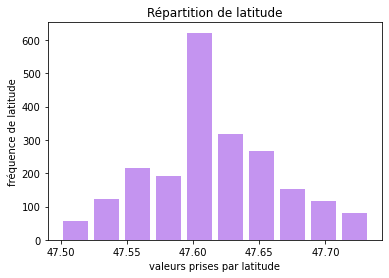

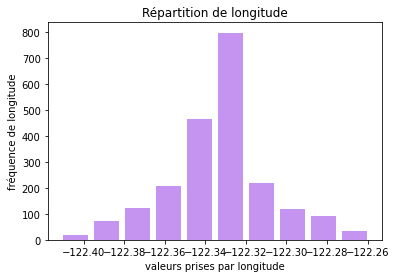

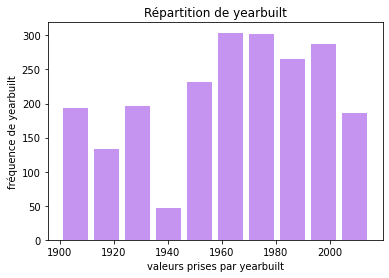

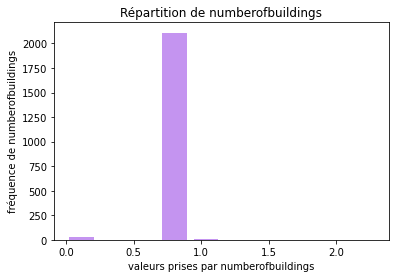

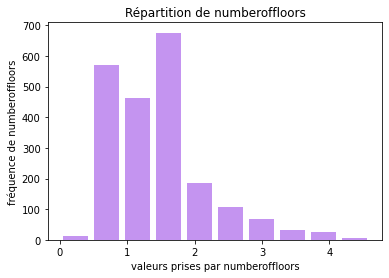

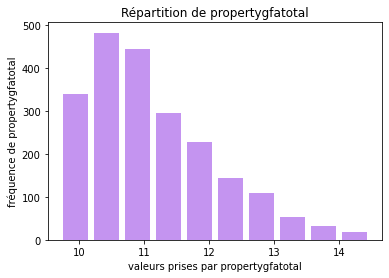

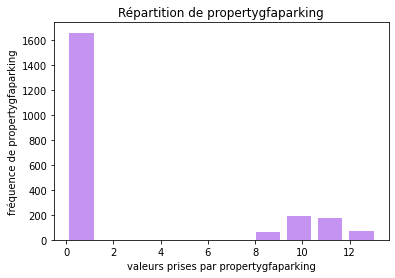

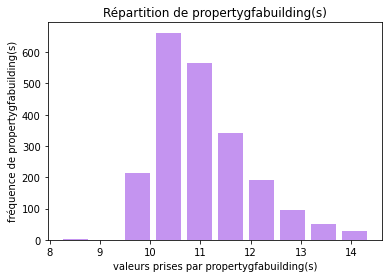

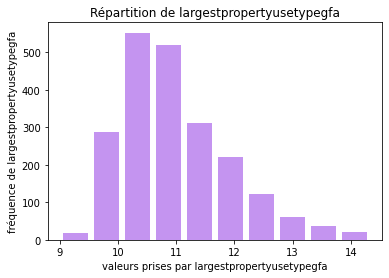

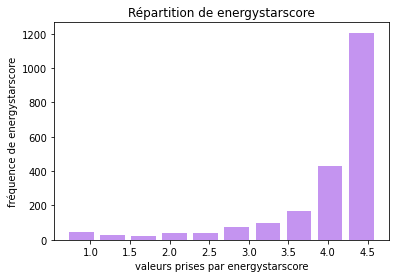

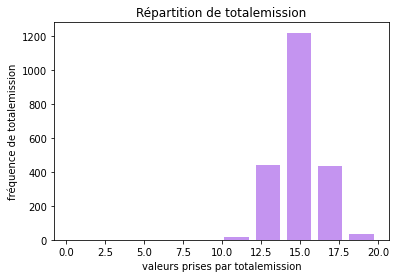

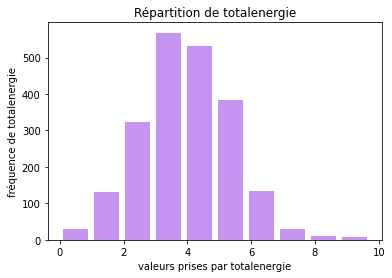

In [101]:
# Passage au log pour certaines données non catégorielles

if energystar == False:
    l= ['numberofbuildings',
        'numberoffloors',
        'propertygfatotal',
        'propertygfaparking',
        'propertygfabuilding(s)',
        'largestpropertyusetypegfa',
        'totalemission',
        'totalenergie']
else:
    l= ['numberofbuildings',
        'numberoffloors',
        'propertygfatotal',
        'propertygfaparking',
        'propertygfabuilding(s)',
        'largestpropertyusetypegfa',
        'energystarscore',
        'totalemission',
        'totalenergie']

for col in l:
        df[col] = np.log(df[col]+ 1)
    
# passage au log pour les données energies (NOT USED)
'''for col in df:
    if re.match(r'[\w]*\(kbtu[/]?[\w]*\)', col) or re.match(r'[\w]*\(kwh\)', col) or re.match(r'[\w]*\(therms\)', col) or (col == 'totalghgemissions'):
        df[col] = np.log(df[col] + 1)
'''
#visualisation des données
for col in df:
    plt.hist(df[col], color = 'blueviolet', alpha = 0.5, histtype = 'barstacked', rwidth=0.8)
    plt.xlabel('valeurs prises par {}'.format(col))
    plt.ylabel('fréquence de {}'.format(col))
    plt.title('Répartition de {}'.format(col))
    plt.show()


### Visualisation des correlation entre les input et les outputs

In [102]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,zipcode,councildistrictcode,latitude,longitude,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,energystarscore,totalemission,totalenergie
zipcode,1.00,-0.18,0.02,-0.06,0.08,-0.01,-0.27,-0.15,-0.15,-0.13,-0.12,0.00,-0.14,-0.11
councildistrictcode,-0.18,1.00,0.53,-0.32,-0.01,-0.01,0.47,0.25,0.31,0.21,0.20,0.06,0.26,0.19
latitude,0.02,0.53,1.00,-0.11,0.07,0.03,0.06,-0.03,0.08,-0.05,-0.03,0.03,0.05,0.06
longitude,-0.06,-0.32,-0.11,1.00,-0.03,0.04,-0.06,-0.02,-0.09,-0.01,-0.01,0.02,-0.02,0.01
yearbuilt,0.08,-0.01,0.07,-0.03,1.00,0.03,0.06,0.28,0.36,0.22,0.26,-0.04,0.25,0.14
numberofbuildings,-0.01,-0.01,0.03,0.04,0.03,1.00,0.01,0.05,-0.02,0.05,0.07,-0.01,0.07,0.09
numberoffloors,-0.27,0.47,0.06,-0.06,0.06,0.01,1.00,0.66,0.48,0.63,0.61,0.14,0.55,0.41
propertygfatotal,-0.15,0.25,-0.03,-0.02,0.28,0.05,0.66,1.00,0.47,0.98,0.96,0.13,0.78,0.64
propertygfaparking,-0.15,0.31,0.08,-0.09,0.36,-0.02,0.48,0.47,1.00,0.32,0.37,-0.01,0.38,0.22
propertygfabuilding(s),-0.13,0.21,-0.05,-0.01,0.22,0.05,0.63,0.98,0.32,1.00,0.96,0.15,0.77,0.65


In [103]:
df.corr()[['energystarscore', 'totalemission', 'totalenergie']].style.background_gradient(cmap='coolwarm').set_precision(2)


,energystarscore,totalemission,totalenergie
zipcode,0.00,-0.14,-0.11
councildistrictcode,0.06,0.26,0.19
latitude,0.03,0.05,0.06
longitude,0.02,-0.02,0.01
yearbuilt,-0.04,0.25,0.14
numberofbuildings,-0.01,0.07,0.09
numberoffloors,0.14,0.55,0.41
propertygfatotal,0.13,0.78,0.64
propertygfaparking,-0.01,0.38,0.22
propertygfabuilding(s),0.15,0.77,0.65


### On ne garde pas les features pour lesquelles on observe une correlation ~ 0. On va également effectuer des test pearson pour evaluer la siginificativité des correlations

p-value pour zipcode: 5.955376816029667e-223
p-value pour councildistrictcode: 0.0
p-value pour yearbuilt: 3.924397107032136e-85
p-value pour numberoffloors: 4.146492930210442e-102
p-value pour propertygfatotal: 7.902594548512668e-55
p-value pour propertygfaparking: 1.434050777849306e-85
p-value pour propertygfabuilding(s): 1.275663271515327e-62
p-value pour largestpropertyusetypegfa: 2.729269160731882e-53
p-value pour energystarscore: 6.288848033552849e-214



correlation: -0.1458072686848798, p-value pour zipcode: 1.1333686607270536e-11


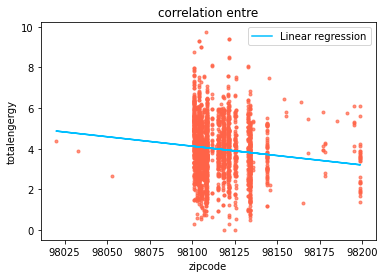

correlation: 0.20309951365600323, p-value pour councildistrictcode: 2.0099645986448893e-21


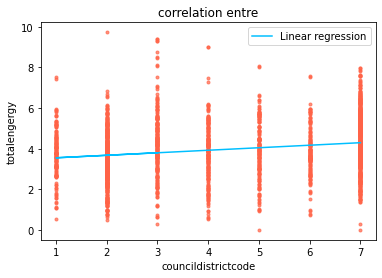

correlation: 0.14584819010064798, p-value pour yearbuilt: 1.1183411706928733e-11


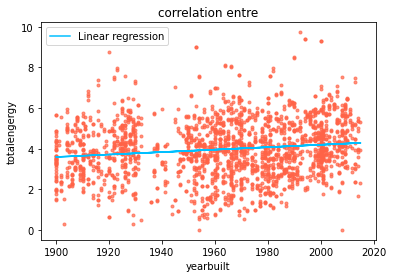

correlation: 0.33964262156060326, p-value pour numberoffloors: 4.095307627508429e-59


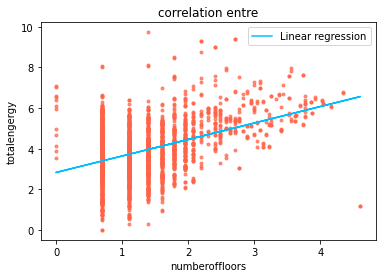

correlation: 0.6083910866900518, p-value pour propertygfatotal: 1.383826295410126e-217


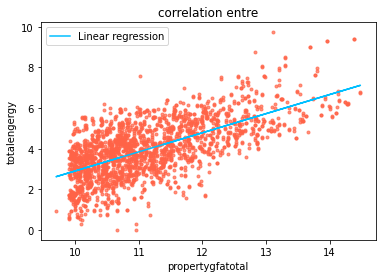

correlation: 0.237230351426673, p-value pour propertygfaparking: 7.548039976647701e-29


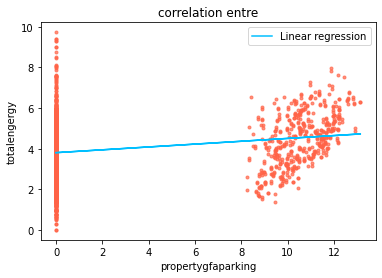

correlation: 0.6118458908975448, p-value pour propertygfabuilding(s): 1.02484790451413e-220


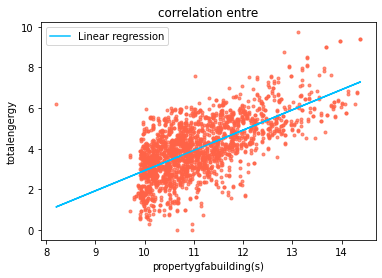

correlation: 0.6076003056508722, p-value pour largestpropertyusetypegfa: 7.115281078724028e-217


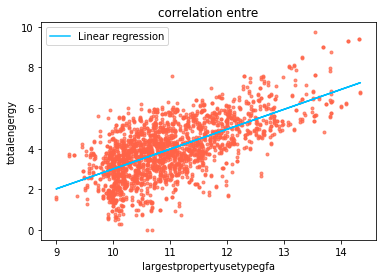

correlation: -0.14507895936947024, p-value pour energystarscore: 1.436381198167389e-11


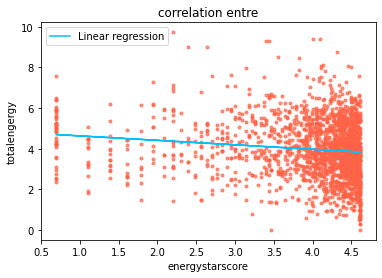

In [104]:
# liste des features avec une correlation differente de 0
if energystar == False:
    l= ['zipcode',
        'councildistrictcode',
        'yearbuilt',
        'numberoffloors',
        'propertygfatotal',
        'propertygfaparking',
        'propertygfabuilding(s)',
        'largestpropertyusetypegfa']
else:
    l= ['zipcode',
        'councildistrictcode',
        'yearbuilt',
        'numberoffloors',
        'propertygfatotal',
        'propertygfaparking',
        'propertygfabuilding(s)',
        'largestpropertyusetypegfa',
        'energystarscore']

# aucune feature n'est normale pvalue ~ 0:
for col in l:
    X, p = normaltest(df[col])
    print("p-value pour {}: {}".format(col, p))

print('\n\n')

# On utilise donc un test de spearman => aux vues des pvalue les correlations sont significatives
for col in l:
    X, p = spearmanr(df[col], df['totalenergie'])
    print("correlation: {}, p-value pour {}: {}".format(X, col, p))
    plt.scatter(df[col], df['totalenergie'], marker = '.', alpha = 0.7, color = 'tomato')
    plt.xlabel(col)
    plt.ylabel("totalengergy")
    plt.title("correlation entre")
    
    reg = LinearRegression().fit(df[col].values.reshape(-1,1), df['totalenergie'].values.reshape(-1,1))
    plt.plot(df[col], reg.predict(df[col].values.reshape(-1,1)), color = 'deepskyblue', label = 'Linear regression')
    plt.legend()
    plt.show()

### Analyse feature enerystarscore

correlation -0.18493746685247509, avec une p-value pour energystarscore: 5.6785606141503755e-18


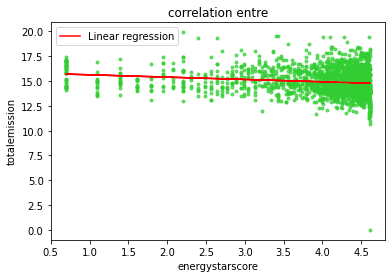

In [117]:
# On utilise donc un test de spearman => aux vues des pvalue les correlations sont significatives

if energystar == True:
    X, p = spearmanr(df['energystarscore'], df['totalemission'])
    print("correlation {}, avec une p-value pour {}: {}".format(X, 'energystarscore', p))
    plt.scatter(df['energystarscore'], df['totalemission'], marker = '.', alpha = 0.7, color = 'limegreen')
    plt.xlabel('energystarscore')
    plt.ylabel("totalemission")
    plt.title("correlation entre")
    
    reg = LinearRegression().fit(df['energystarscore'].values.reshape(-1,1), df['totalemission'].values.reshape(-1,1))
    plt.plot(df[col], reg.predict(df['energystarscore'].values.reshape(-1,1)), color = 'red', label = 'Linear regression')
    plt.legend()
    plt.show()
    
    plt.show()

# Anova sur les features categorielles 

<AxesSubplot:title={'center':'totalenergie'}, xlabel='primarypropertytype'>

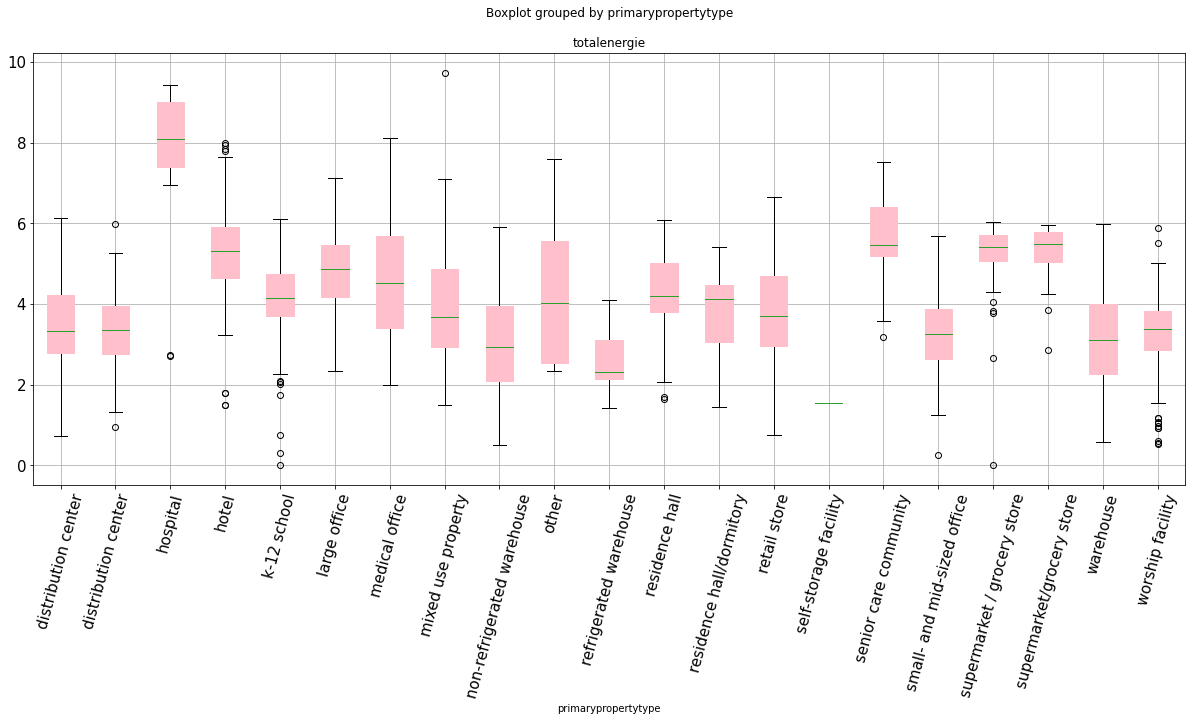

In [106]:
# visualisation 'primarypropertytype' boxplot
df.boxplot(column = 'totalenergie', by = 'primarypropertytype',fontsize = 15, figsize = (20, 8), rot= 75, color = {"boxes": 'pink', 'whiskers' :'black'}, patch_artist= True)

In [107]:
# On utilise un test type kruskal(sur les mediane car nos données ne pas normale)
l = df['primarypropertytype'].value_counts().index.tolist()
w = []
for val in l:
    dft = df[df['primarypropertytype']  == val]
    w.append(dft['totalenergie'].tolist())

# On constate que les medianes ont des valeurs 
#significativement differentes puisque la pvalue est quasiment nulle.
print(kruskal(*w))

KruskalResult(statistic=803.8495840080836, pvalue=2.155911848620084e-157)


<AxesSubplot:title={'center':'totalenergie'}, xlabel='neighborhood'>

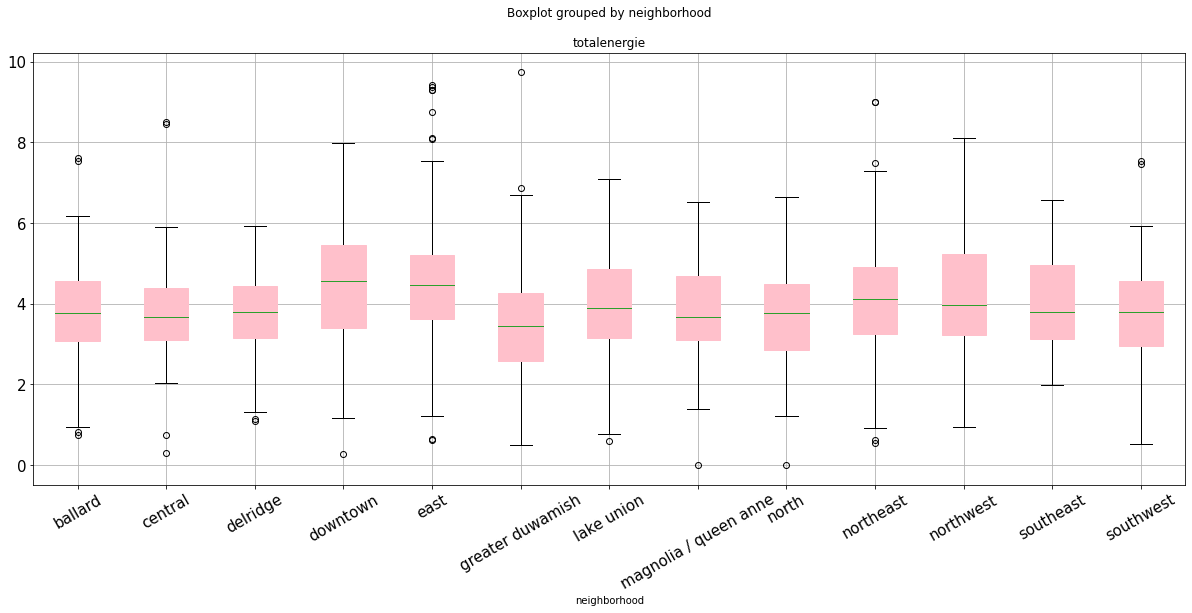

In [108]:
# visualisation des features boxplot
df.boxplot(column = 'totalenergie', by = 'neighborhood',fontsize = 15, figsize = (20, 8), rot= 30, color = {"boxes": 'pink', 'whiskers' : 'black'}, patch_artist= True)

In [109]:
# On utilise un test type kruskal(sur les mediane car nos données ne pas normale)
l = df['neighborhood'].value_counts().index.tolist()
w = []
for val in l:
    dft = df[df['neighborhood']  == val]
    w.append(dft['totalenergie'].tolist())

# On constate que les medianes ont des valeurs 
#significativement differentes puisque la pvalue est quasiment nulle.
print(kruskal(*w))

KruskalResult(statistic=151.60704050804642, pvalue=2.675649105848006e-26)


### On conserve donc les features categorielles car leurs p-value ~ 0
### on conserve donc uniquement les features ayant un interet au vue des differents tests statistiques passés 

In [110]:
if energystar == False:
    df = df[['primarypropertytype',
             'zipcode',
             'councildistrictcode',
             'neighborhood',
             'yearbuilt',
             'numberoffloors', 
             'propertygfatotal', 
             'propertygfaparking', 
             'propertygfabuilding(s)',
             'largestpropertyusetypegfa',
             'totalemission', 
             'totalenergie']]
else:
    df = df[['primarypropertytype',
             'zipcode',
             'councildistrictcode',
             'neighborhood',
             'yearbuilt',
             'numberoffloors', 
             'propertygfatotal', 
             'propertygfaparking', 
             'propertygfabuilding(s)',
             'largestpropertyusetypegfa',
             'energystarscore',
             'totalemission', 
             'totalenergie']]

In [111]:
# Visualisation des données avant enregistrements
df.head(10)

,primarypropertytype,zipcode,councildistrictcode,neighborhood,yearbuilt,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding(s),largestpropertyusetypegfa,energystarscore,totalemission,totalenergie
0,hotel,98101.0,7,downtown,1927,2.564949,11.390023,0.000000,11.390023,11.390023,4.189655,15.758764,5.523179
1,hotel,98101.0,7,downtown,1996,2.484907,11.547974,9.620129,11.390792,11.337154,3.951244,15.938279,5.577879
2,hotel,98101.0,7,downtown,1969,3.737670,13.776760,0.000000,13.776760,13.537441,2.944439,18.107758,7.631664
3,hotel,98101.0,7,downtown,1926,2.397895,11.023878,0.000000,11.023878,11.023878,0.693147,17.155872,7.569071
4,hotel,98121.0,7,downtown,1980,2.944439,11.694338,9.430359,11.584604,11.723559,4.219508,16.512102,6.231858
6,hotel,98101.0,7,downtown,1926,2.484907,11.326704,0.000000,11.326704,11.306553,3.258097,15.648547,5.344533
8,hotel,98104.0,7,downtown,1904,2.772589,12.007530,0.000000,12.007530,12.007530,3.850148,16.351882,5.806971
11,hotel,98101.0,7,downtown,1998,3.258097,12.716429,11.021281,12.513616,12.726772,3.496508,17.137557,6.585344
12,hotel,98104.0,7,downtown,1928,2.302585,11.082296,0.000000,11.082296,11.082296,3.688879,15.733496,5.816724
13,hotel,98101.0,7,downtown,1980,3.526361,12.663349,10.961295,12.462082,12.596465,4.043051,16.942784,6.516696


In [112]:
df.shape

(2147, 13)

# Enregistrement

In [113]:
X = df.to_numpy()

from pickle import Pickler as pck
with open('/home/sylvain/Téléchargements/X_file_3', 'wb') as file:
    myPickler = pck(file)
    myPickler.dump(X)

with open('/home/sylvain/Téléchargements/energystar', 'wb') as file:
    myPickler = pck(file)
    myPickler.dump(energystar)

In [114]:
print(X)

[['hotel' 98101.0 7 ... 4.189654742026425 15.758764181578377
  5.523179440356211]
 ['hotel' 98101.0 7 ... 3.9512437185814275 15.938279273580385
  5.577879057767046]
 ['hotel' 98101.0 7 ... 2.9444389791664403 18.10775822120787
  7.631664421192123]
 ...
 ['warehouse' 98108.0 2 ... 3.6375861597263857 15.0980698871671
  5.0670156275323635]
 ['small- and mid-sized office' 98108.0 2 ... 2.302585092994046
  15.30179764138188 4.911183215124596]
 ['k-12 school' 98144.0 3 ... 4.356708826689592 14.097657653151904
  2.3263016196113617]]
